<a href="https://colab.research.google.com/github/dostonshernazarov/Air_ticket_prices_RandomForest_model/blob/main/Aviachipta_narxlari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import sklearn
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.model_selection import train_test_split,ShuffleSplit,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [6]:
with zipfile.ZipFile('/content/aviachipta-narxini-bashorat-qilish.zip', 'r') as zip_ref:
  zip_ref.extractall()

In [7]:
df = pd.read_csv('/content/train_data.csv', index_col="id")
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [6]:
df.shape

(20000, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 1 to 20000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20000 non-null  object 
 1   flight            20000 non-null  object 
 2   source_city       20000 non-null  object 
 3   departure_time    20000 non-null  object 
 4   stops             20000 non-null  object 
 5   arrival_time      20000 non-null  object 
 6   destination_city  20000 non-null  object 
 7   class             20000 non-null  object 
 8   duration          20000 non-null  float64
 9   days_left         20000 non-null  int64  
 10  price             20000 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.8+ MB


In [8]:
df.describe()

,duration,days_left,price
count,20000.000000,20000.000000,20000.000000
mean,12.177627,25.924150,20960.281700
std,7.157944,13.624874,22775.459535
min,0.830000,1.000000,1105.000000
25%,6.830000,14.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.080000,38.000000,42521.000000
max,38.580000,49.000000,114523.000000


In [9]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [13]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [53]:
df['stops'].unique()

array(['one', 'zero', 'two_or_more'], dtype=object)

In [54]:
df['airline'].value_counts()

airline
Vistara      8535
Air_India    5371
Indigo       2924
GO_FIRST     1508
AirAsia      1056
SpiceJet      606
Name: count, dtype: int64

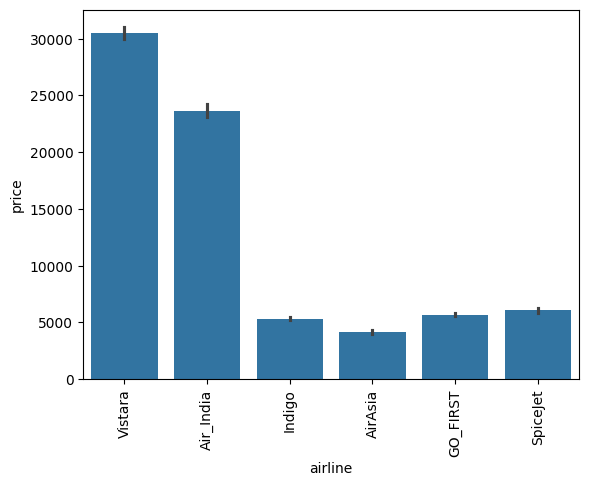

In [55]:
sns.barplot(x='airline',y='price',data=df.sort_values('price',ascending=False))
plt.xticks(rotation=90)
plt.show()

In [28]:
df['source_city'].value_counts()

source_city
Mumbai       4068
Delhi        4022
Bangalore    3486
Kolkata      3092
Hyderabad    2748
Chennai      2584
Name: count, dtype: int64

<Axes: xlabel='source_city', ylabel='price'>

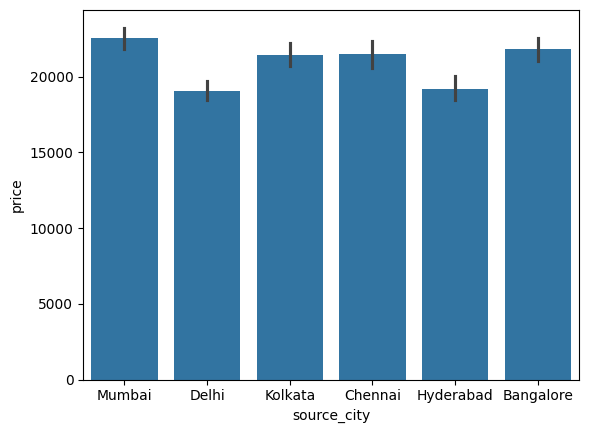

In [56]:
sns.barplot(x='source_city',y='price',data=df.sort_values('price',ascending=False))

In [29]:
df['destination_city'].value_counts()

destination_city
Mumbai       3918
Delhi        3825
Bangalore    3425
Kolkata      3323
Hyderabad    2814
Chennai      2695
Name: count, dtype: int64

<Axes: xlabel='destination_city', ylabel='price'>

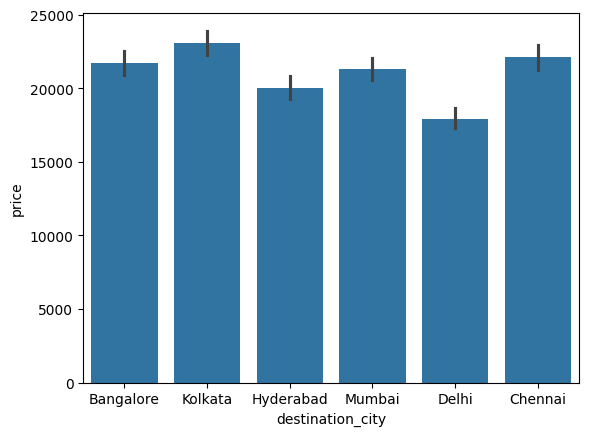

In [57]:
sns.barplot(x='destination_city',y='price',data=df.sort_values('price',ascending=False))

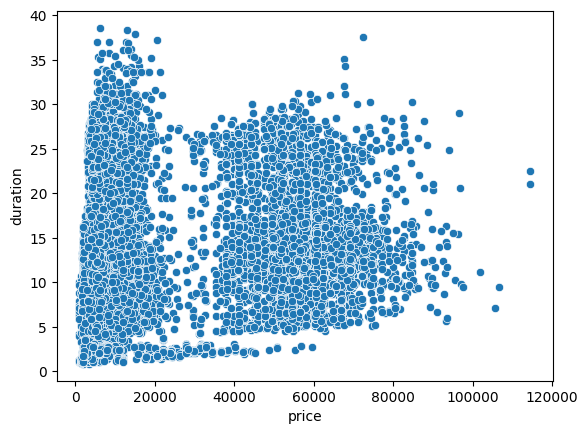

In [58]:
sns.scatterplot(data=df,x='price',y='duration')
plt.show()

In [33]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,
1,Vistara,Bangalore,Early_Morning,1,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,Hyderabad,Evening,0,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,Bangalore,Morning,1,Evening,Delhi,Business,9.58,5,60553
4,Vistara,Kolkata,Morning,1,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,Chennai,Early_Morning,0,Morning,Mumbai,Economy,2.00,4,10712


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 1 to 20000
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20000 non-null  object 
 1   source_city       20000 non-null  int64  
 2   departure_time    20000 non-null  object 
 3   stops             20000 non-null  int64  
 4   arrival_time      20000 non-null  object 
 5   destination_city  20000 non-null  int64  
 6   class             20000 non-null  object 
 7   duration          20000 non-null  float64
 8   days_left         20000 non-null  int64  
 9   price             20000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 1.7+ MB


In [59]:
df['departure_time'].value_counts(), df['arrival_time'].value_counts()

(departure_time
 Morning          4738
 Early_Morning    4432
 Evening          4341
 Night            3231
 Afternoon        3166
 Late_Night         92
 Name: count, dtype: int64,
 arrival_time
 Night            6142
 Evening          5316
 Morning          4086
 Afternoon        2536
 Early_Morning    1004
 Late_Night        916
 Name: count, dtype: int64)

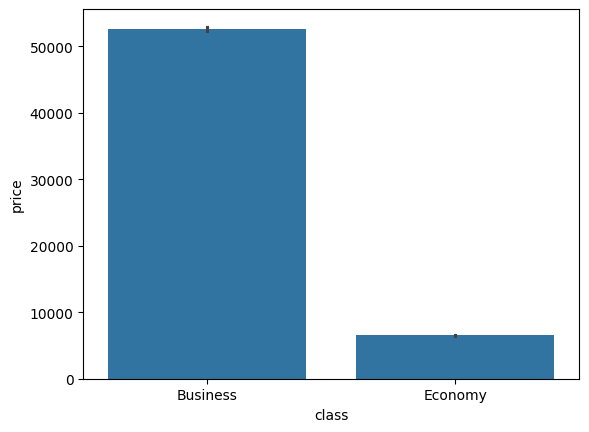

In [60]:
sns.barplot(x='class',y='price',data=df.sort_values('price',ascending=False))
plt.show()

In [8]:
df.drop(['flight'], axis=1, inplace=True)
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,
1,Vistara,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
4,Vistara,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...
19996,Indigo,Bangalore,Night,one,Early_Morning,Mumbai,Economy,7.92,45,3153
19997,AirAsia,Kolkata,Morning,one,Afternoon,Delhi,Economy,5.83,24,3911
19998,Vistara,Chennai,Early_Morning,two_or_more,Evening,Bangalore,Economy,35.33,17,14822


In [64]:
df['airline'].unique()

array(['Vistara', 'SpiceJet', 'Indigo', 'Air_India', 'GO_FIRST',
       'AirAsia'], dtype=object)

In [9]:
# Separate label
X = df.drop(['price'], axis=1)
y = df['price']


In [10]:
# String columns
char_columns = ['class', 'airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city']

# Number columns
num_columns = ['duration', 'days_left']

# Pipeline for number columns
num_pipe = Pipeline([
    ("std_scaler", StandardScaler())
])

# Full pipeline
full_pipe = ColumnTransformer([
    ('num', num_pipe, num_columns),
    ('cat', OrdinalEncoder(), char_columns)
])

full_df = full_pipe.fit_transform(X)
full_df

array([[ 0.28952803, -0.36141789,  1.        , ...,  0.        ,
         5.        ,  5.        ],
       [-1.45682723, -1.38897606,  1.        , ...,  2.        ,
         5.        ,  4.        ],
       [-0.36291029, -1.53577008,  0.        , ...,  0.        ,
         2.        ,  2.        ],
       ...,
       [ 3.23458153, -0.65500594,  1.        , ...,  1.        ,
         2.        ,  0.        ],
       [ 0.58012154, -0.36141789,  1.        , ...,  0.        ,
         4.        ,  0.        ],
       [ 0.84836171,  0.00556716,  1.        , ...,  0.        ,
         4.        ,  1.        ]])

In [11]:
# Separate train, test
X_train, X_test, y_train, y_test = train_test_split(full_df,y,test_size=0.2, random_state=12)

In [12]:
# Searching Best Model Using GridSeacrhCV

def find_best_model(X,y):
    algos = {
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
            }
        },
        'random_forest':{
            'model':RandomForestRegressor(),
            'params':{
                'n_estimators':range(100,400,100),
                'max_depth':[10,20,30,40,50],
                # 'min_samples_split':range(2,10,2),
                # 'min_samples_leaf':range(1,10,2)
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'splitter':['best','random'],
                'max_depth':[10,20,30],
                'min_samples_split':range(2,20,2),
                'min_samples_leaf':range(1,10,2)
             }
        },
        'Knearest_neighbour':{
            'model':KNeighborsRegressor(),
            'params':{
                'n_neighbors':[1,3,5,7]
             }
        },
        'SVR':{
            'model':SVR(),
            'params':{
                'C':[0.1,0.5,1,1.5,2]
             }
        },



    }

    scores = []

    cv = ShuffleSplit(n_splits=5,random_state=0,test_size=0.2)

    for model_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'Model Name':model_name,
            'Best Score':gs.best_score_,
            'Best Params':gs.best_params_
        })

    return pd.DataFrame(scores)

In [13]:
find_best_model(full_df, y)

,Model Name,Best Score,Best Params
0,linear_regression,0.903319,{}
1,random_forest,0.970817,"{'max_depth': 30, 'n_estimators': 300}"
2,decision_tree,0.960246,"{'max_depth': 20, 'min_samples_leaf': 9, 'min_..."
3,Knearest_neighbour,0.848882,{'n_neighbors': 3}
4,SVR,-0.316542,{'C': 2}


In [27]:
# Built model

model = RandomForestRegressor(max_depth=30, n_estimators=300)

model.fit(X_train, y_train)

print(model.score(X_test,y_test))

In [15]:
# Predict result
y_train_pred = model.predict(X_train)

y_test_pred = model.predict(X_test)

In [17]:
# function for model evaluation
def model_evaluation(y_actual,y_pred):
  r2 = r2_score(y_actual,y_pred)
  mae = mean_absolute_error(y_actual,y_pred)
  mse = mean_squared_error(y_actual,y_pred)
  rmse = np.sqrt(mean_squared_error(y_actual,y_pred))
  return pd.Series({'r2_score':r2,'mse':mse,'mae':mae,'rmse':rmse})

In [18]:
# Scores on Train Data
train_score = model_evaluation(y_train,y_train_pred)

# Scores on Test Data
test_score = model_evaluation(y_test,y_test_pred)



In [20]:
# Score info of Train and Test Data
scorecard = pd.concat([train_score,test_score],axis=1)
scorecard.columns = ['Train Data','Test Data']
scorecard



,Train Data,Test Data
r2_score,9.960259e-01,9.697830e-01
mse,2.074766e+06,1.526290e+07
mae,7.648919e+02,2.056451e+03
rmse,1.440405e+03,3.906776e+03


In [25]:
# Cross Validation
cross_val_score(model,full_df,y,scoring='r2',cv=10).mean()

0.9721666453427327

In [30]:
filename = "RF_air_ticket_prices_model.pkl"

with open (filename, "wb") as pklModel:
  pickle.dump(model, pklModel)